# **Sentiment Analysis**

# **Large Movie Review Dataset**
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

### **Extract and analyse the contents of the dataset**

In [ ]:
import tarfile
import os

# Path to the tar file
tar_path = '/content/aclImdb_v1.tar.gz'

# Check if the file exists
if not os.path.exists(tar_path):
    print(f'The file {tar_path} does not exist.')
else:
    # Open the tar file
    with tarfile.open(tar_path, 'r') as tar:
        # Extract all contents into the current directory
        tar.extractall()
        print(f'Extracted {tar_path} successfully.')


Extracted /content/aclImdb_v1.tar.gz successfully.


#### **Reading Text Files (Reviews):**

In [ ]:
import pandas as pd

# Reading a positive review from the train set
file_path = '/content/aclImdb/train/pos/10000_8.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    review_text = file.read()

print(review_text)


Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they'll be next to end up on the streets.<br /><br />But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home, the entertainment sets, a bathroom, pictures on the wall, a computer, and everything you once treasure to see what it's like to be homeless? That is Goddard Bolt's lesson.<br /><br />Mel Brooks (who directs) who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival (Jeffery Tambor) to see if he can live in the streets for thirty days without th

In [ ]:
# Reading a negative review from the train set
file_path = '/content/aclImdb/train/neg/10000_4.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    review_text = file.read()

print(review_text)

Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son. The luxury jetliner takes off as planned but mid-air the plane is hi-jacked by the co-pilot Chambers (Robert Foxworth) & his two accomplice's Banker (Monte Markham) & Wilson (Michael Pataki) who knock the passengers & crew out with sleeping gas, they plan to steal the valuable cargo & land on a disused plane strip on an isolated island but while making his descent Chambers almost hits an oil rig in the Ocean & loses control of the plane sending it crashing into the sea where it sinks to the bottom right bang in the middle of the Bermuda Triangle. With air in short supply, water leaking in & having flown over 200 miles off course the problems mount for t

#### **Reading IMDb URLs (urls_[pos, neg, unsup].txt):**

In [ ]:
# Example: Reading IMDb URLs using pandas
urls_pos_file = '/content/aclImdb/train/urls_pos.txt'
df_urls_pos = pd.read_csv(urls_pos_file, header=None, names=['IMDb_URL'])

print(df_urls_pos.head())


                                           IMDb_URL
0  http://www.imdb.com/title/tt0453418/usercomments
1  http://www.imdb.com/title/tt0453418/usercomments
2  http://www.imdb.com/title/tt0453418/usercomments
3  http://www.imdb.com/title/tt0064354/usercomments
4  http://www.imdb.com/title/tt0064354/usercomments


#### **Reading Bag of Words (BoW) Features (.feat files):**

In [ ]:
# Reading a .feat file using pandas (though pandas is not typically used for LIBSVM format)
from sklearn.datasets import load_svmlight_file
import pandas as pd

# Example path to your .feat file
feat_file_path = '/content/aclImdb/train/labeledBow.feat'

# Load LIBSVM formatted file
# This function from scikit-learn correctly loads the LIBSVM formatted file into a sparse matrix X.
# The _ variable captures the labels if they are present in the file.

X, _ = load_svmlight_file(feat_file_path)

# Convert sparse matrix to dense NumPy array
# X.toarray(): Converts the sparse matrix X to a dense NumPy array, which can then be converted to a pandas DataFrame
dense_matrix = X.toarray()

# Create DataFrame if necessary
df_feat = pd.DataFrame(dense_matrix)

print(df_feat.head())





   0      1      2      3      4      5      6      7      8      9      ...  \
0    9.0    1.0    4.0    4.0    6.0    4.0    2.0    2.0    4.0    0.0  ...   
1    7.0    4.0    2.0    2.0    0.0    4.0    1.0    0.0    2.0    2.0  ...   
2    4.0    4.0    4.0    7.0    2.0    1.0    1.0    1.0    0.0    1.0  ...   
3   10.0    2.0    2.0    0.0    3.0    2.0    4.0    2.0    0.0    1.0  ...   
4   13.0    9.0    6.0    4.0    2.0    5.0   10.0    6.0    0.0    2.0  ...   

   89517  89518  89519  89520  89521  89522  89523  89524  89525  89526  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 89527 columns]


#### **Reading imdb.vocab:**

In [ ]:
# Reading imdb.vocab using pandas
# This file contains text tokens corresponding to feature indices in .feat files.
vocab_file = '/content/aclImdb/imdb.vocab'
df_vocab = pd.read_csv(vocab_file, sep='\t', header=None, names=['token'])

print(df_vocab.head())


  token
0   the
1   and
2     a
3    of
4    to


In [ ]:
# Read the reviews
# Define the function to read reviews
def read_reviews(directory):
    """
    Read all the reviews from a given directory and label them as positive (1) or negative (0).

    Parameters:
    directory (str): The path to the directory containing the 'pos' and 'neg' subdirectories with review files.

    Returns:
    reviews (list): A list of review texts.
    labels (list): A list of labels corresponding to the reviews (1 for positive, 0 for negative).
    """
    reviews = []
    labels = []

    # Loop through both 'pos' and 'neg' subdirectories
    for label in ['pos', 'neg']:
        label_dir = os.path.join(directory, label)  # Construct the path to the subdirectory

        # Loop through all files in the current subdirectory
        for filename in os.listdir(label_dir):
            if filename.endswith(".txt"):  # Check if the file is a text file
                # Open and read the content of the text file
                with open(os.path.join(label_dir, filename), 'r', encoding='utf-8') as file:
                    reviews.append(file.read())  # Append the review text to the reviews list

                # Append the corresponding label (1 for positive, 0 for negative)
                labels.append(1 if label == 'pos' else 0)

    return reviews, labels  # Return the lists of reviews and labels





In [ ]:
# Read reviews from train and test directories
train_dir = '/content/aclImdb/train'  # Path to the training dataset
test_dir = '/content/aclImdb/test'    # Path to the test dataset

# Read the reviews and labels from the training dataset
train_reviews, train_labels = read_reviews(train_dir)

# Read the reviews and labels from the test dataset
test_reviews, test_labels = read_reviews(test_dir)

In [ ]:
# Convert the reviews and labels into DataFrames
# Create a DataFrame for the training dataset
train_df = pd.DataFrame({'review': train_reviews, 'label': train_labels})

# Create a DataFrame for the test dataset
test_df = pd.DataFrame({'review': test_reviews, 'label': test_labels})

# Display the first few rows of the DataFrames
print(train_df.head())
print(test_df.head())

                                              review  label
0  "Mechenosets" is one of the most beautiful rom...      1
1  The film begins with Vincent Price about to be...      1
2  I agree with "Jerry." It's a very underrated s...      1
3  "Dô desu ka den" is the first colored movie of...      1
4  Anyone who finds this film boring is a hopeles...      1
                                              review  label
0  This indie film is worth a look because of the...      1
1  Fast Times it ain't. But check this movie out,...      1
2  Great period piece that shows how attitudes ha...      1
3  I'm giving this film 9 out of 10 only because ...      1
4  This has one of the more unusual plots I've se...      1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


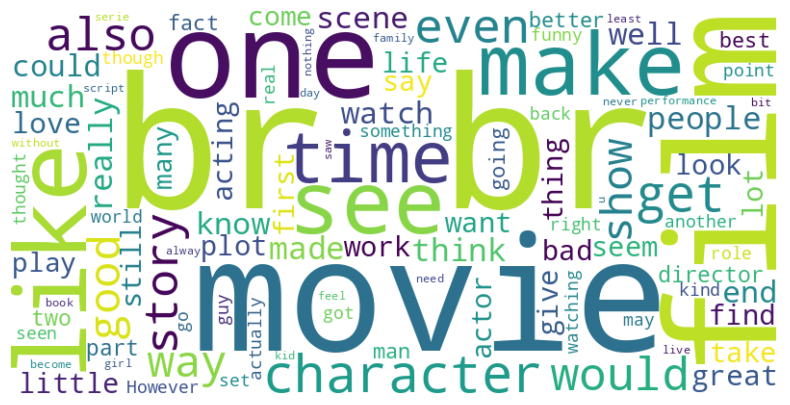

In [ ]:
!pip install wordcloud nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Read reviews from the training directory
train_dir = '/content/aclImdb/train'
train_reviews, train_labels = read_reviews(train_dir)

# Preprocess the text data
# Concatenate all reviews into a single text string
all_train_reviews = ' '.join(train_reviews)

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Generate the word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate(all_train_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

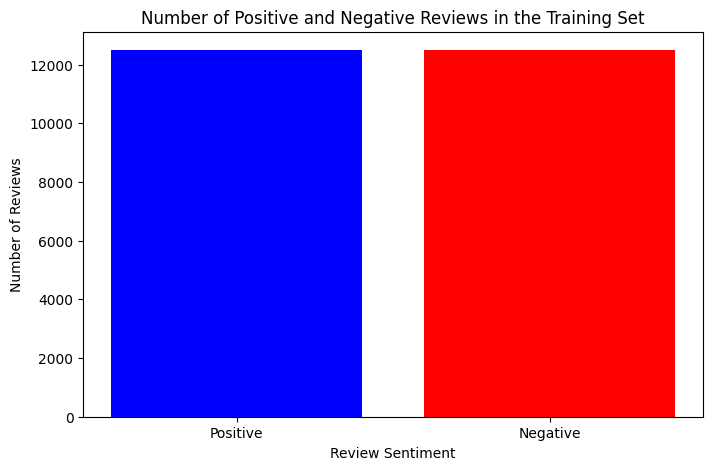

In [ ]:
# Count the labels
positive_count = train_labels.count(1)
negative_count = train_labels.count(0)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['blue', 'red'])
plt.xlabel('Review Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Number of Positive and Negative Reviews in the Training Set')
plt.show()


**Preprocessing**

1.   Lower Case: Convert all text to lower case to ensure uniformity.
2.   Non-Alpha Numeric Removal: Remove characters that are not letters or numbers to clean the text.
3.  Tokenisation: Split text into individual words or tokens.
Stopword Removal: Remove common words that do not add significant meaning to the text (e.g., "and", "the").
4.  Lemmatisation: Reduce words to their base or root form (e.g., "running" to "run") to standardize words.
5.  Stemming: Reduce words to their root form by removing suffixes (e.g., "running" to "run") to simplify text.

### **1. Removing punctuations like., ! $( ) * % @**

In [ ]:
# Define the cleaning function
import re

def clean_text(text):
    """
    Clean the text by removing URLs, punctuation, and non-alphanumeric characters.

    Parameters:
    text (str): The original text.

    Returns:
    str: The cleaned text.
    """
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the train reviews
cleaned_train_reviews = [clean_text(review) for review in train_reviews]

# Create a DataFrame with the cleaned reviews and labels
df_train = pd.DataFrame({'Review': cleaned_train_reviews, 'Label': train_labels})

# Display the first few rows of the DataFrame
print(df_train.head())

# Optionally save the cleaned data to a CSV file
# df.to_csv('/content/df_train.csv', index=False)

                                              Review  Label
0  Mechenosets is one of the most beautiful roman...      1
1  The film begins with Vincent Price about to be...      1
2  I agree with Jerry Its a very underrated space...      1
3  D desu ka den is the first colored movie of Ma...      1
4  Anyone who finds this film boring is a hopeles...      1


In [ ]:
# Apply the cleaning function to the test reviews
cleaned_test_reviews = [clean_text(review) for review in test_reviews]

# Create a DataFrame with the cleaned reviews and labels
df_test = pd.DataFrame({'Review': cleaned_test_reviews, 'Label': test_labels})

# Display the first few rows of the DataFrame
print(df_test.head())

# Optionally save the cleaned data to a CSV file
# df.to_csv('/content/cleaned_test_reviews.csv', index=False)

                                              Review  Label
0  This indie film is worth a look because of the...      1
1  Fast Times it aint But check this movie out it...      1
2  Great period piece that shows how attitudes ha...      1
3  Im giving this film 9 out of 10 only because t...      1
4  This has one of the more unusual plots Ive see...      1


#### **Remove Stop Words**

In [ ]:
# prompt: Using dataframe df: we need to remove stops words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df_train['Review'] = df_train['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_test['Review'] = df_test['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df_train.head()

,Review,Label
0,Mechenosets one beautiful romantic movies Ive ...,1
1,The film begins Vincent Price begin performanc...,1
2,I agree Jerry Its underrated space movie cours...,1
3,D desu ka den first colored movie Master Akira...,1
4,Anyone finds film boring hopeless bonehead sti...,1


#### **Lammatization**

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


df_train['Review'] = df_train['Review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

df_train.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review,Label
0,Mechenosets one beautiful romantic movie Ive e...,1
1,The film begin Vincent Price begin performance...,1
2,I agree Jerry Its underrated space movie cours...,1
3,D desu ka den first colored movie Master Akira...,1
4,Anyone find film boring hopeless bonehead stic...,1
5,The sitcom revolved around girl must learn res...,1
6,This movie supposed made fascinating setting c...,1
7,Being fan first Lion King I definitely looking...,1
8,In sendup horror film 50 cold war paranoia Rea...,1
9,Home Room came total surprise Not clue paid bi...,1


In [ ]:
df_test['Review'] = df_test['Review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

df_test.head(10)

,Review,Label
0,This indie film worth look enormous talent cre...,1
1,Fast Times aint But check movie heart Pour dri...,1
2,Great period piece show attitude changed 40 ye...,1
3,Im giving film 9 10 arent enough specific scie...,1
4,This one unusual plot Ive seen horror film bas...,1
5,Many earlier comment right money well muchbr b...,1
6,I saw FAREWELL TO HARRY Plaza Theatre New York...,1
7,10 respected director shot short film operatic...,1
8,The creator Donnie Darko brings twilight zone ...,1
9,Daisy Movie Review By James Mudge From beyondh...,1


#### **Stemming**

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df_train['Review'] = df_train['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_train.head()

,Review,Label
0,mechenoset one beauti romant movi ive ever see...,1
1,the film begin vincent price begin perform mag...,1
2,i agre jerri it underr space movi cours mani g...,1
3,d desu ka den first color movi master akira ku...,1
4,anyon find film bore hopeless bonehead stick c...,1


In [ ]:
df_test['Review'] = df_test['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_test.head()

,Review,Label
0,thi indi film worth look enorm talent creator ...,1
1,fast time aint but check movi heart pour drink...,1
2,great period piec show attitud chang 40 year g...,1
3,im give film 9 10 arent enough specif scientif...,1
4,thi one unusu plot ive seen horror film base g...,1


#### **Tokenization**

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df_train['Tokenized_Review'] = df_train['Review'].apply(word_tokenize)
df_train['Tokenized_Review'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [mechenoset, one, beauti, romant, movi, ive, e...
1    [the, film, begin, vincent, price, begin, perf...
2    [i, agre, jerri, it, underr, space, movi, cour...
3    [d, desu, ka, den, first, color, movi, master,...
4    [anyon, find, film, bore, hopeless, bonehead, ...
Name: Tokenized_Review, dtype: object

In [ ]:
df_test['Tokenized_Review'] = df_test['Review'].apply(word_tokenize)
df_test['Tokenized_Review'].head()

0    [thi, indi, film, worth, look, enorm, talent, ...
1    [fast, time, aint, but, check, movi, heart, po...
2    [great, period, piec, show, attitud, chang, 40...
3    [im, give, film, 9, 10, arent, enough, specif,...
4    [thi, one, unusu, plot, ive, seen, horror, fil...
Name: Tokenized_Review, dtype: object

#### **Sentiment Analysis Using ML Models**

Training Logistic Regression...
Logistic Regression Metrics:
Accuracy: 0.8816
Precision: 0.8760265936644506
Recall: 0.8906560636182903
F1-score: 0.8832807570977919
ROC-AUC: 0.9508502306083019

Training Multinomial Naive Bayes...
Multinomial Naive Bayes Metrics:
Accuracy: 0.8472
Precision: 0.852881902458686
Recall: 0.841351888667992
F1-score: 0.8470776621297037
ROC-AUC: 0.9254369957318463

Training Random Forest...
Random Forest Metrics:
Accuracy: 0.8364
Precision: 0.846751123825092
Recall: 0.8238568588469185
F1-score: 0.8351471180975415
ROC-AUC: 0.9183489805633004

Training Support Vector Machine...
Support Vector Machine Metrics:
Accuracy: 0.8854
Precision: 0.8772338772338772
Recall: 0.8978131212723658
F1-score: 0.8874042051483592
ROC-AUC: 0.9543976383149794



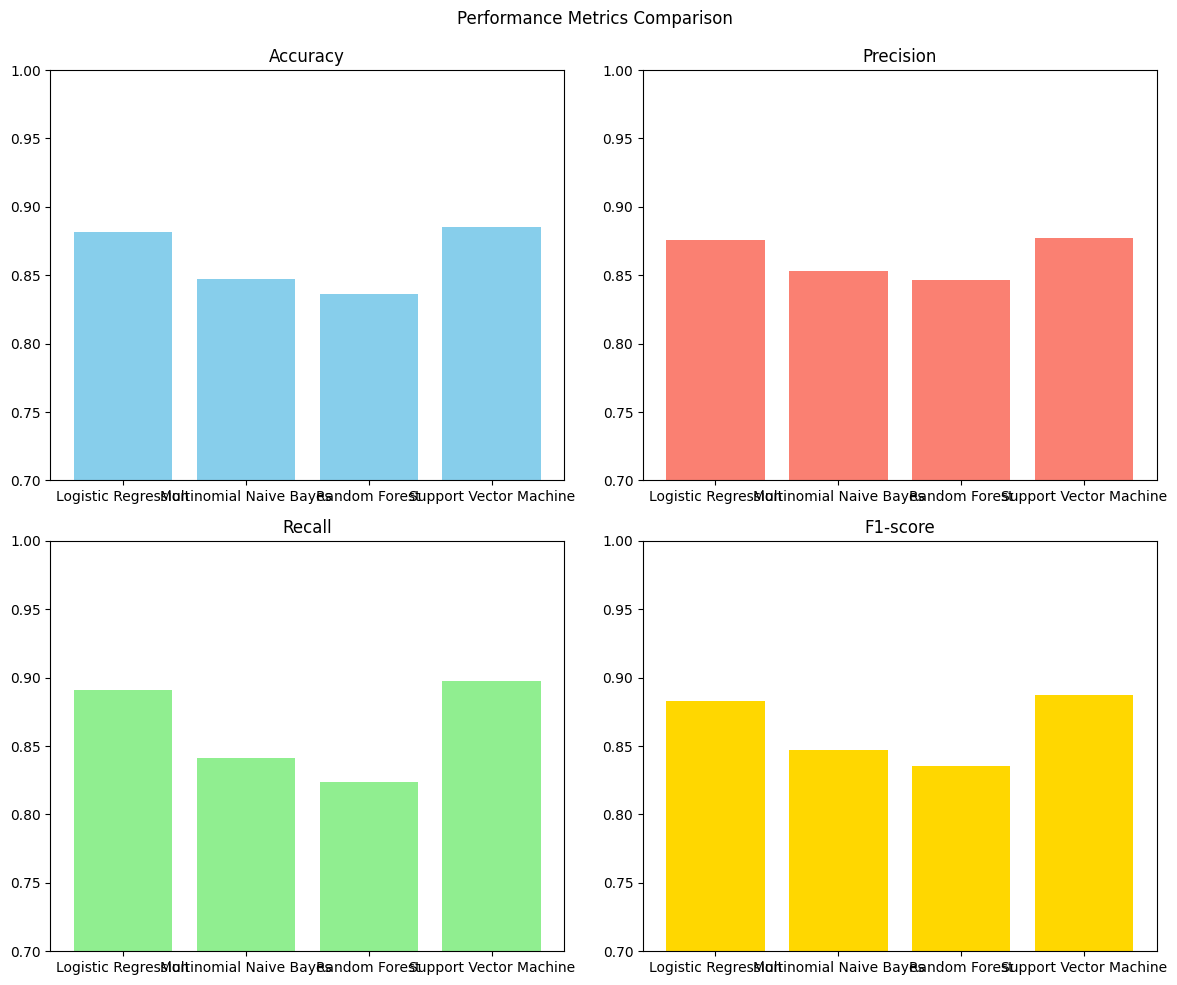

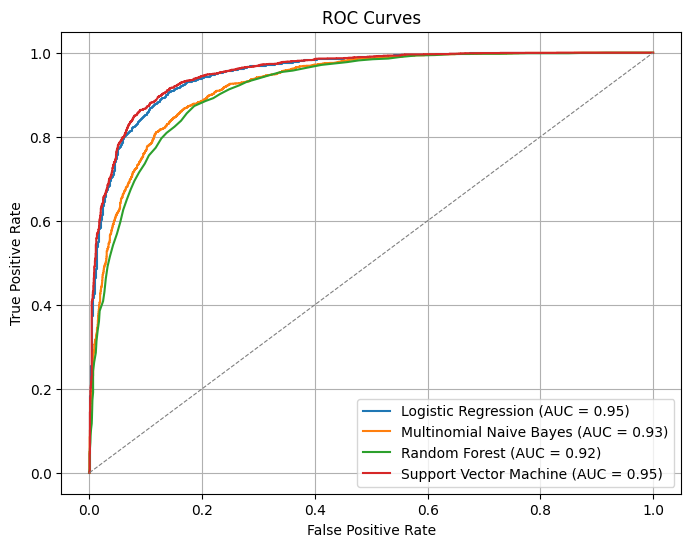

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Step 1: Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(df_train['Review'])
X_test_vec = vectorizer.transform(df_test['Review'])
y_train = df_train['Label']
y_test = df_test['Label']

# Step 2: Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_vec, y_train, test_size=0.2, random_state=42)

# Step 3: Build and train the models using Pipeline
# Pipeline for Logistic Regression
pipeline_lr = Pipeline([
    ('clf', LogisticRegression(max_iter=1000))
])

# Pipeline for Multinomial Naive Bayes
pipeline_nb = Pipeline([
    ('clf', MultinomialNB())
])

# Pipeline for Random Forest
pipeline_rf = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

# Pipeline for Support Vector Machine (SVM)
pipeline_svm = Pipeline([
    ('clf', SVC(probability=True))
])

# List of pipelines for easy iteration
pipelines = [pipeline_lr, pipeline_nb, pipeline_rf, pipeline_svm]
pipeline_names = ['Logistic Regression', 'Multinomial Naive Bayes', 'Random Forest', 'Support Vector Machine']

# Metrics storage
metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'ROC-AUC': [],
}

# Step 4: Train the models and evaluate on the validation set
for pipe, name in zip(pipelines, pipeline_names):
    print(f'Training {name}...')
    pipe.fit(X_train_split, y_train_split)  # Train the pipeline on the split training data
    y_pred = pipe.predict(X_val)  # Predict on the validation set

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # For ROC-AUC, predict probabilities if available (SVM has probabilities, others use decision_function or predict_proba)
    if hasattr(pipe['clf'], 'predict_proba'):
        y_prob = pipe.predict_proba(X_val)[:, 1]
    elif hasattr(pipe['clf'], 'decision_function'):
        y_prob = pipe.decision_function(X_val)
    else:
        y_prob = y_pred  # Use predictions as probabilities (e.g., for MultinomialNB)

    roc_auc = roc_auc_score(y_val, y_prob)

    # Store metrics in dictionary
    metrics_dict['Model'].append(name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1-score'].append(f1)
    metrics_dict['ROC-AUC'].append(roc_auc)

    # Print metrics
    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print(f'ROC-AUC: {roc_auc}\n')



<ipython-input-30-5be5d383d869>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(metrics_df['Model'], rotation=45)
<ipython-input-30-5be5d383d869>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(metrics_df['Model'], rotation=45)
<ipython-input-30-5be5d383d869>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(metrics_df['Model'], rotation=45)
<ipython-input-30-5be5d383d869>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(metrics_df['Model'], rotation=45)


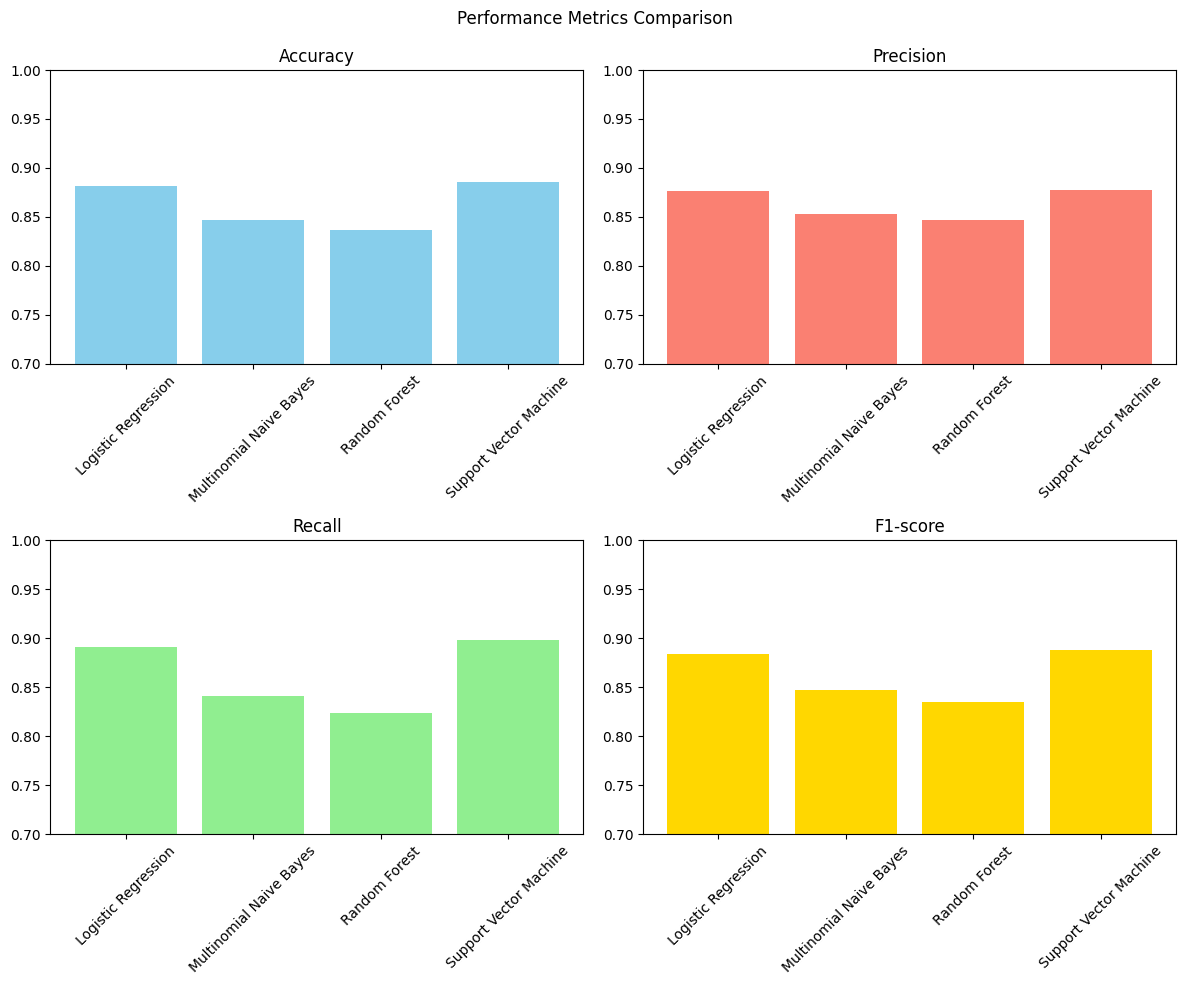

In [ ]:
import matplotlib.pyplot as plt

# Plotting metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Performance Metrics Comparison')

# Bar chart for Accuracy
axes[0, 0].bar(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim([0.7, 1.0])
axes[0, 0].set_xticklabels(metrics_df['Model'], rotation=45)

# Bar chart for Precision
axes[0, 1].bar(metrics_df['Model'], metrics_df['Precision'], color='salmon')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim([0.7, 1.0])
axes[0, 1].set_xticklabels(metrics_df['Model'], rotation=45)

# Bar chart for Recall
axes[1, 0].bar(metrics_df['Model'], metrics_df['Recall'], color='lightgreen')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim([0.7, 1.0])
axes[1, 0].set_xticklabels(metrics_df['Model'], rotation=45)

# Bar chart for F1-score
axes[1, 1].bar(metrics_df['Model'], metrics_df['F1-score'], color='gold')
axes[1, 1].set_title('F1-score')
axes[1, 1].set_ylim([0.7, 1.0])
axes[1, 1].set_xticklabels(metrics_df['Model'], rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


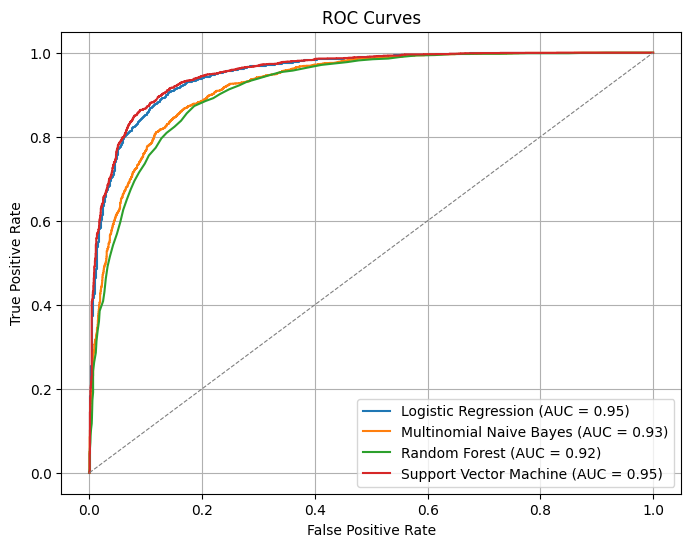

In [ ]:
# ROC curves
plt.figure(figsize=(8, 6))
for pipe, name in zip(pipelines, pipeline_names):
    if hasattr(pipe['clf'], 'predict_proba'):
        y_prob = pipe.predict_proba(X_val)[:, 1]
    elif hasattr(pipe['clf'], 'decision_function'):
        y_prob = pipe.decision_function(X_val)
    else:
        y_prob = y_pred  # Use predictions as probabilities (e.g., for MultinomialNB)

    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

This structured approach using Pipeline simplifies the workflow by encapsulating the vectorization and classification steps into a single object, enhancing code readability and maintainability. Adjust parameters (max_features, max_iter, etc.) and pipeline components as per your specific requirements and dataset characteristics.